<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook I have classified handwritten digits using a simple neural network (ANN) first and than repeated same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

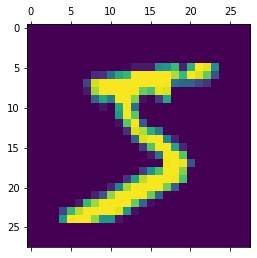

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2704 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1237 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0856 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0647 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0508 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0412 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 936us/step - loss: 0.0835 - accuracy: 0.9751


[0.083468958735466, 0.9750999808311462]

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [13]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1559 - accuracy: 0.9536
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0558 - accuracy: 0.9828
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0170 - accuracy: 0.9946


In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0463 - accuracy: 0.9864


[0.04627421125769615, 0.9864000082015991]

Hence the CNN is more accurate tha ANN because for ANN accuracy was 97.51% 
and for CNN is 98.64%



